In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[12,8])
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

<Figure size 864x576 with 0 Axes>

# 1. Problem Statement

In [2]:
# Predict the price of cars using various variables

# 2. Data Gathering

In [3]:
df = pd.read_csv('autos_dataset.csv')
df.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# 3. EDA

# 4. Feature Engineering

In [7]:
df.replace({'?':np.nan}, inplace= True)
df.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,NaN,NaN,NaN,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


In [8]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [10]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [11]:
df.drop(['make', 'aspiration', 'fuel-type', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
        'engine-type','fuel-system'],axis=1, inplace = True)

In [12]:
df.drop('normalized-losses', axis =1 , inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   num-of-cylinders   205 non-null    object 
 7   engine-size        205 non-null    int64  
 8   bore               201 non-null    object 
 9   stroke             201 non-null    object 
 10  compression-ratio  205 non-null    float64
 11  horsepower         203 non-null    object 
 12  peak-rpm           203 non-null    object 
 13  city-mpg           205 non-null    int64  
 14  highway-mpg        205 non-null    int64  
 15  price              201 non-null    object 
dtypes: float64(5), int64(5), o

In [14]:
df.isna().sum()

symboling            0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
num-of-cylinders     0
engine-size          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [15]:
df['bore'].fillna(df['bore'].median(),inplace=True)
df['stroke'].fillna(df['stroke'].median(),inplace=True)
df['horsepower'].fillna(df['horsepower'].median(),inplace=True)
df['peak-rpm'].fillna(df['peak-rpm'].median(),inplace=True)
df['price'].fillna(df['price'].median(),inplace=True)

In [16]:
df.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
wheel-base,88.6,88.6,94.5,99.8,99.4
length,168.8,168.8,171.2,176.6,176.6
width,64.1,64.1,65.5,66.2,66.4
height,48.8,48.8,52.4,54.3,54.3
curb-weight,2548,2548,2823,2337,2824
num-of-cylinders,four,four,six,four,five
engine-size,130,130,152,109,136
bore,3.47,3.47,2.68,3.19,3.19
stroke,2.68,2.68,3.47,3.4,3.4


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   num-of-cylinders   205 non-null    object 
 7   engine-size        205 non-null    int64  
 8   bore               205 non-null    object 
 9   stroke             205 non-null    object 
 10  compression-ratio  205 non-null    float64
 11  horsepower         205 non-null    object 
 12  peak-rpm           205 non-null    object 
 13  city-mpg           205 non-null    int64  
 14  highway-mpg        205 non-null    int64  
 15  price              205 non-null    object 
dtypes: float64(5), int64(5), o

In [18]:
df['bore'] = df['bore'].astype(float)
df['stroke'] = df['stroke'].astype(float)
df['horsepower'] = df['horsepower'].astype(float)
df['peak-rpm'] = df['peak-rpm'].astype(float)
df['price'] = df['price'].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   num-of-cylinders   205 non-null    object 
 7   engine-size        205 non-null    int64  
 8   bore               205 non-null    float64
 9   stroke             205 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  horsepower         205 non-null    float64
 12  peak-rpm           205 non-null    float64
 13  city-mpg           205 non-null    int64  
 14  highway-mpg        205 non-null    int64  
 15  price              205 non-null    float64
dtypes: float64(10), int64(5), 

In [20]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [21]:
df['num-of-cylinders'].replace({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8},inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   num-of-cylinders   205 non-null    int64  
 7   engine-size        205 non-null    int64  
 8   bore               205 non-null    float64
 9   stroke             205 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  horsepower         205 non-null    float64
 12  peak-rpm           205 non-null    float64
 13  city-mpg           205 non-null    int64  
 14  highway-mpg        205 non-null    int64  
 15  price              205 non-null    float64
dtypes: float64(10), int64(6)
m

<AxesSubplot:>

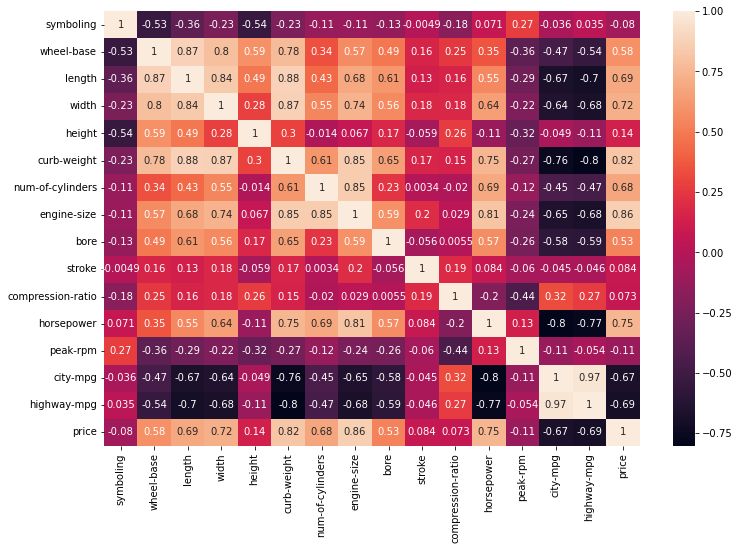

In [23]:
plt.figure(figsize=[12,8])
sns.heatmap(df.corr(),annot=True)


In [24]:
y = df['price']
x = df.drop('price',axis=1)
x.head()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)
x_train

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
160,0,95.7,166.3,64.4,53.0,2094,4,98,3.19,3.03,9.0,70.0,4800.0,38,47
98,2,95.1,162.4,63.8,53.3,2008,4,97,3.15,3.29,9.4,69.0,5200.0,31,37
127,3,89.5,168.9,65.0,51.6,2756,6,194,3.74,2.90,9.5,207.0,5900.0,17,25
47,0,113.0,199.6,69.6,52.8,4066,6,258,3.63,4.17,8.1,176.0,4750.0,15,19
91,1,94.5,165.3,63.8,54.5,1918,4,97,3.15,3.29,9.4,69.0,5200.0,31,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0,114.2,198.9,68.4,56.7,3285,4,120,3.46,2.19,8.4,95.0,5000.0,19,24
64,0,98.8,177.8,66.5,55.5,2425,4,122,3.39,3.39,8.6,84.0,4800.0,26,32
15,0,103.5,189.0,66.9,55.7,3230,6,209,3.62,3.39,8.0,182.0,5400.0,16,22
125,3,94.5,168.9,68.3,50.2,2778,4,151,3.94,3.11,9.5,143.0,5500.0,19,27


# Model Training

In [26]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

### residual

1. Normality of residual:
    1. Density plot
    2. qq plot 
    3. shapiro test
    4. kstest
    5. normaltest
2. homoscedasticty:
    scatterplot
3. multicolnearity:
    VIF


In [27]:
y_pred = lr_model.predict(x_test)
residual = y_test - y_pred
residual

131     -461.108560
117     -283.945110
63     -2115.441671
56      5930.346555
49    -16640.695902
60     -1814.110451
19      -238.746550
171    -2413.544065
163     2161.591392
203     2772.523628
5        114.633164
173      136.431195
159    -2612.887477
114      428.502498
129   -28382.152582
101   -10655.396107
61       825.208922
116      114.203791
1       2832.483858
2      -3292.777771
35      -617.617987
10      3688.619144
167    -5379.320976
178    -5793.295745
6        198.233689
75     -2806.294105
99     -2135.656266
20       185.049060
39      -965.015153
102    -9952.709027
95      1564.150647
154     1318.880839
52       298.704788
58      5936.196317
70      6719.158794
68      2822.713044
46      1184.766676
103   -10657.623278
147    -1187.757991
76      -765.260725
176     1981.656141
Name: price, dtype: float64

## 1. Density plot

sns.kdeplot(residual,fill=True)

## 2. Shapiro Test

Null Hypothesis >> data was drawn from normal distribution
Accept >> H0 >> If p_value is greater than your significance level(0.05%)

Reject >> Ha >> If p_value is less than or equal to your significance level(0.05%)
Alternate Hypothesis>> data was not drawn from normal distribution



In [28]:
from scipy.stats import shapiro , kstest, normaltest

In [29]:
a, p_value = shapiro(residual)
print('P_value is :',p_value)

alpha =0.05
if p_value > alpha:
    print('Data is normally distributed')
    
else:
    print('Data is not normally distributed')

P_value is : 1.5074110706336796e-06
Data is not normally distributed


## 3. normal test

In [30]:
a, p_value = normaltest(residual)
print('P_value is :',p_value)

alpha =0.05
if p_value > alpha:
    print('Data is normally distributed')
    
else:
    print('Data is not normally distributed')

P_value is : 5.806371163873733e-09
Data is not normally distributed


## 4. kstest

In [31]:
a, p_value = kstest(residual, 'norm')
print('P_value is :',p_value)

alpha =0.05
if p_value > alpha:
    print('Data is normally distributed')
    
else:
    print('Data is not normally distributed')

P_value is : 1.6559444344151947e-10
Data is not normally distributed


## 5. QQ plot 

In [32]:
import scipy.stats as sts
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


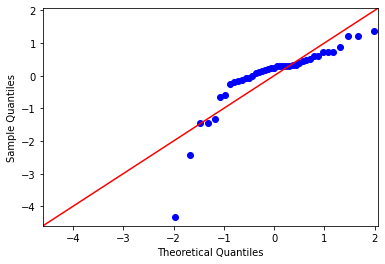

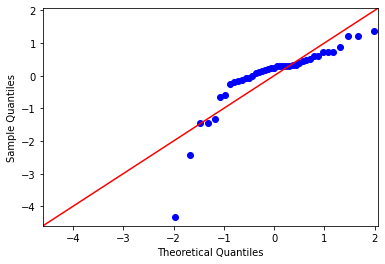

In [33]:
sm.qqplot(residual, line = '45', dist= sts.norm, fit=True )

In [34]:
normal_array = np.random.randn(100)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


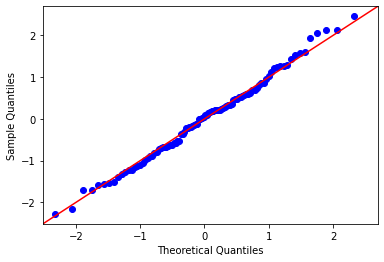

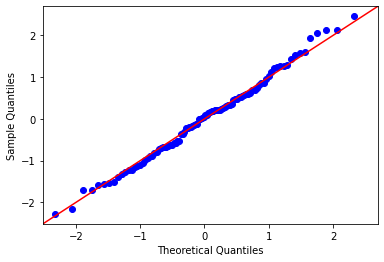

In [35]:
sm.qqplot(normal_array, line = '45', dist= sts.norm, fit=True )

<AxesSubplot:ylabel='Density'>

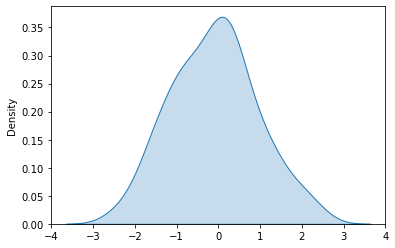

In [36]:
sns.kdeplot(normal_array,fill=True)

In [37]:
a, p_value = shapiro(normal_array)
print('P_value is :',p_value)

alpha =0.05
if p_value > alpha:
    print('Data is normally distributed')
    
else:
    print('Data is not normally distributed')

P_value is : 0.7841551899909973
Data is normally distributed


In [38]:
a, p_value = normaltest(normal_array)
print('P_value is :',p_value)

alpha =0.05
if p_value > alpha:
    print('Data is normally distributed')
    
else:
    print('Data is not normally distributed')

P_value is : 0.7389008605130285
Data is normally distributed


In [39]:
a, p_value = kstest(normal_array,'norm')
print('P_value is :',p_value)

alpha =0.05
if p_value > alpha:
    print('Data is normally distributed')
    
else:
    print('Data is not normally distributed')

P_value is : 0.41526781427793724
Data is normally distributed


# Assumption of Homoscedasticity

In [40]:
assumption of same/equal variance

SyntaxError: invalid syntax (Temp/ipykernel_10144/3053529442.py, line 1)

In [ ]:
sns.scatterplot(y_pred, residual)

## Multicolinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
df = pd.DataFrame()
# x=add_constant(x)
df['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
df['Variable'] = x.columns
df